1) Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model. You have three version of UCI dataset you can use a)Raw data from accelerometer, b)TSFEL featurised data, c)Features provided by author. Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 marks]

C:\Users\Vansh\AppData\Local\Temp\ipykernel_14476\1078321226.py:65: UserWarning: Using default sampling frequency set in configuration file.
  X_train_tsfel = tsfel.time_series_features_extractor(specific_features, X_train_full, window_size=1, verbose=0)


C:\Users\Vansh\AppData\Local\Temp\ipykernel_14476\1078321226.py:66: UserWarning: Using default sampling frequency set in configuration file.
  X_test_tsfel = tsfel.time_series_features_extractor(specific_features, X_test_full, window_size=1, verbose=0)


RAW Accelerometer Data
Test Accuracy: 0.09633333333333334
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.12      0.18      0.15       500
           2       0.00      0.00      0.00       500
           3       0.22      0.30      0.26       500
           4       0.03      0.08      0.04       500
           5       0.25      0.02      0.04       500

    accuracy                           0.10      3000
   macro avg       0.10      0.10      0.08      3000
weighted avg       0.10      0.10      0.08      3000



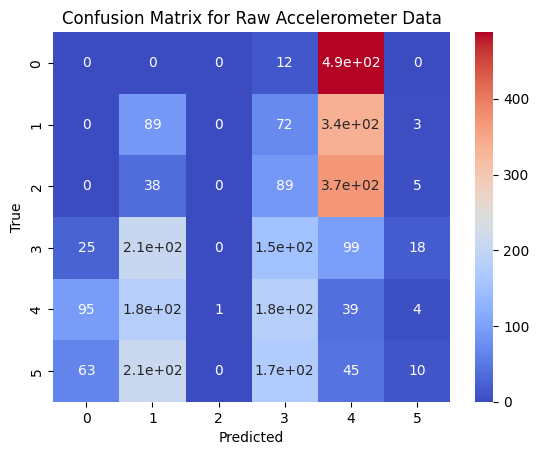

TSFEL Data
PCA Test Accuracy: 0.9966666666666667
PCA Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      0.98      0.99       500
           5       0.98      1.00      0.99       500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



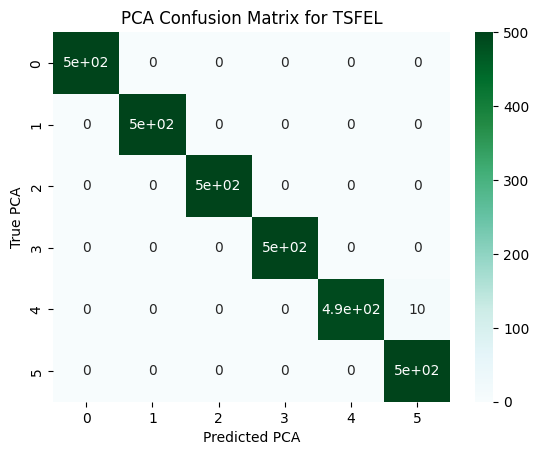

Provided Features Data
Test Accuracy: 0.5924669155072956
Test Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.64      0.64       496
           2       0.63      0.61      0.62       471
           3       0.67      0.59      0.62       420
           4       0.51      0.53      0.52       491
           5       0.55      0.60      0.57       532
           6       0.58      0.58      0.58       537

    accuracy                           0.59      2947
   macro avg       0.60      0.59      0.59      2947
weighted avg       0.60      0.59      0.59      2947



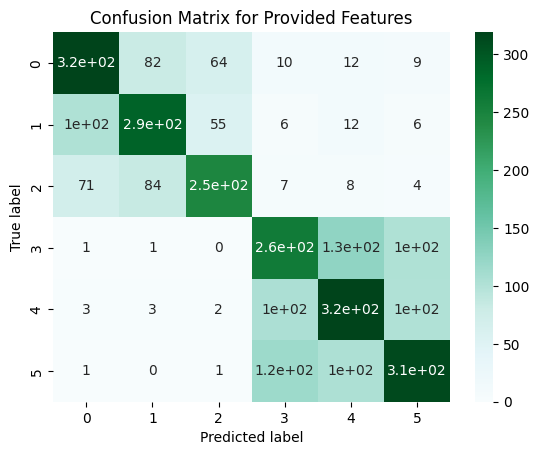

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
import tsfel


train_paths = {
    'Laying' : r"Combined/Train/LAYING/Subject_3.csv",
    'Sitting' : r"Combined/Train/SITTING/Subject_3.csv",
    'Standing' : r"Combined/Train/STANDING/Subject_3.csv",
    'Walking' : r"Combined/Train/WALKING/Subject_3.csv",
    'Walking_Downstairs' : r"Combined/Train/WALKING_DOWNSTAIRS/Subject_3.csv",
    'walking_Upstairs' : r"Combined/Train/WALKING_UPSTAIRS/Subject_3.csv"
}

#Our test readings
test_paths = {
    'Laying' : r"Kushal/LAYING_2.csv",
    'Sitting' : r"Kushal/SITTING_2.csv",
    'Standing' : r"Kushal/STANDING_2.csv",
    'Walking' : r"Kushal/WALKING_2.csv",
    'Walking_Downstairs' : r"Kushal/DOWN_2.csv" ,
    'walking_Upstairs' : r"Kushal/UP_2.csv" 
}


train_final_data, train_label_list = [], []
for activity, path in train_paths.items():
    raw_data = pd.read_csv(path, nrows=500)
    raw_data['activity_code'] = list(train_paths.keys()).index(activity)
    raw_data['acc_sum'] = raw_data['accx']**2 + raw_data['accy']**2 + raw_data['accz']**2
    train_final_data.append(raw_data[['accx', 'accy', 'accz', 'acc_sum', 'activity_code']])
    train_label_list.append(raw_data['activity_code'])

X_train_full = pd.concat(train_final_data, ignore_index=True)
y_train_full = np.concatenate(train_label_list)
X_train_full, y_train_full = shuffle(X_train_full, y_train_full, random_state=123)

test_final_data, test_label_list = [], []
for activity, path in test_paths.items():
    raw_data_test = pd.read_csv(path, nrows=500)
    raw_data_test['activity_code'] = list(test_paths.keys()).index(activity)
    raw_data_test['acc_sum'] = raw_data_test['accx']**2 + raw_data_test['accy']**2 + raw_data_test['accz']**2
    test_final_data.append(raw_data_test[['accx', 'accy', 'accz', 'acc_sum', 'activity_code']])
    test_label_list.append(raw_data_test['activity_code'])

X_test_full = pd.concat(test_final_data, ignore_index=True)
y_test_full = np.concatenate(test_label_list)

config_statistical = tsfel.get_features_by_domain('statistical')
specific_features = {
    'statistical': {
        'RMS': config_statistical['statistical']['Root mean square'],
        'STD': config_statistical['statistical']['Standard deviation'],
        'AVG': config_statistical['statistical']['Mean']
    }
}

X_train_tsfel = tsfel.time_series_features_extractor(specific_features, X_train_full, window_size=1, verbose=0)
X_test_tsfel = tsfel.time_series_features_extractor(specific_features, X_test_full, window_size=1, verbose=0)

pca_model = PCA(n_components=2)
X_train_pca = pca_model.fit_transform(X_train_tsfel)
X_test_pca = pca_model.transform(X_test_tsfel)

train_pca_frame = pd.DataFrame(X_train_pca, columns=['PCA_Component1', 'PCA_Component2'])
test_pca_frame = pd.DataFrame(X_test_pca, columns=['PCA_Component1', 'PCA_Component2'])

train_pca_frame['activity'] = y_train_full
test_pca_frame['activity'] = y_test_full

model_classifier = DecisionTreeClassifier()
model_classifier.fit(X_train_full[['accx', 'accy', 'accz', 'acc_sum']], y_train_full)
predictions = model_classifier.predict(X_test_full[['accx', 'accy', 'accz', 'acc_sum']])

print("RAW Accelerometer Data")
print("Test Accuracy:", accuracy_score(y_test_full, predictions))
print("Test Classification Report:")
print(classification_report(y_test_full, predictions))

conf_matrix = confusion_matrix(y_test_full, predictions)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix for Raw Accelerometer Data")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("TSFEL Data")
model_classifier.fit(train_pca_frame[['PCA_Component1', 'PCA_Component2']], y_train_full)
pca_predictions = model_classifier.predict(test_pca_frame[['PCA_Component1', 'PCA_Component2']])

print("PCA Test Accuracy:", accuracy_score(y_test_full, pca_predictions))
print("PCA Test Classification Report:")
print(classification_report(y_test_full, pca_predictions))

pca_conf_matrix = confusion_matrix(y_test_full, pca_predictions)
sns.heatmap(pca_conf_matrix, annot=True, cmap="BuGn")
plt.title("PCA Confusion Matrix for TSFEL")
plt.xlabel("Predicted PCA")
plt.ylabel("True PCA")
plt.show()

body_acc_x_train = r'UCI HAR Dataset\train\Inertial Signals\body_acc_x_train.txt'
body_acc_y_train = r'UCI HAR Dataset\train\Inertial Signals\body_acc_y_train.txt'
body_acc_z_train = r'UCI HAR Dataset\train\Inertial Signals\body_acc_z_train.txt'

body_gyro_x_train = r'UCI HAR Dataset\train\Inertial Signals\body_gyro_x_train.txt'
body_gyro_y_train = r'UCI HAR Dataset\train\Inertial Signals\body_gyro_y_train.txt'
body_gyro_z_train = r'UCI HAR Dataset\train\Inertial Signals\body_gyro_z_train.txt'

y_train_path = r'UCI HAR Dataset\train\y_train.txt'

acc_x = np.loadtxt(body_acc_x_train)
acc_y = np.loadtxt(body_acc_y_train)
acc_z = np.loadtxt(body_acc_z_train)
gyro_x = np.loadtxt(body_gyro_x_train)
gyro_y = np.loadtxt(body_gyro_y_train)
gyro_z = np.loadtxt(body_gyro_z_train)
y_train_provided = np.loadtxt(y_train_path).astype(int)

X_train_provided = np.hstack((acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z))

body_acc_x_test = r'UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt'
body_acc_y_test = r'UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt'
body_acc_z_test = r'UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt'

body_gyro_x_test = r'UCI HAR Dataset\test\Inertial Signals\body_gyro_x_test.txt'
body_gyro_y_test = r'UCI HAR Dataset\test\Inertial Signals\body_gyro_y_test.txt'
body_gyro_z_test = r'UCI HAR Dataset\test\Inertial Signals\body_gyro_z_test.txt'

y_test_path = r'UCI HAR Dataset\test\y_test.txt'

acc_x_test = np.loadtxt(body_acc_x_test)
acc_y_test = np.loadtxt(body_acc_y_test)
acc_z_test = np.loadtxt(body_acc_z_test)
gyro_x_test = np.loadtxt(body_gyro_x_test)
gyro_y_test = np.loadtxt(body_gyro_y_test)
gyro_z_test = np.loadtxt(body_gyro_z_test)
y_test_provided = np.loadtxt(y_test_path).astype(int)

X_test_provided = np.hstack((acc_x_test, acc_y_test, acc_z_test, gyro_x_test, gyro_y_test, gyro_z_test))

model_classifier = DecisionTreeClassifier()
model_classifier.fit(X_train_provided, y_train_provided)

y_pred = model_classifier.predict(X_test_provided)

print("Provided Features Data")
print("Test Accuracy:", accuracy_score(y_test_provided, y_pred))
print("Test Classification Report:")
print(classification_report(y_test_provided, y_pred))

conf_matrix = confusion_matrix(y_test_provided, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="BuGn")
plt.title('Confusion Matrix for Provided Features')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Model 1: Exhibits very poor performance with low accuracy, precision, recall, and F1-scores across most classes. The confusion matrix indicates numerous misclassifications.

Model 2: Shows outstanding performance with exceptionally high accuracy and strong precision, recall, and F1-scores for all classes. There are minimal misclassifications.

Model 3: Demonstrates moderate performance with a good test accuracy, outperforming Model 1 but falling short of the accuracy achieved by Model 2.

Therefore, Model 2 is the most effective.

In [19]:
# Our Training 

laying_train = pd.read_csv(r"Kushal/LAYING_1.csv")
sitting_train = pd.read_csv(r"Kushal/SITTING_1.csv")
standing_train = pd.read_csv(r"Kushal/STANDING_1.csv")
walking_train = pd.read_csv(r"Kushal/WALKING_1.csv")
downstairs_train = pd.read_csv(r"Kushal/DOWN_1.csv")
upstairs_train = pd.read_csv(r"Kushal/UP_1.csv")

laying_train = pd.DataFrame(laying_train).head(100)
sitting_train = pd.DataFrame(sitting_train).head(100)
standing_train = pd.DataFrame(standing_train).head(100)
walking_train = pd.DataFrame(walking_train).head(100)
downstairs_train = pd.DataFrame(downstairs_train).head(100)
upstairs_train = pd.DataFrame(upstairs_train).head(100)

# Our Testing

laying_test =  pd.read_csv(r"Kushal/LAYING_2.csv")
sitting_test = pd.read_csv(r"Kushal/SITTING_2.csv")
standing_test=  pd.read_csv(r"Kushal/STANDING_2.csv")
walking_test=  pd.read_csv(r"Kushal/WALKING_2.csv")
upstairs_test=  pd.read_csv(r"Kushal/DOWN_2.csv")
downstairs_test=  pd.read_csv(r"Kushal/UP_2.csv")

laying_test = pd.DataFrame(laying_test).head(100)
sitting_test = pd.DataFrame(sitting_test).head(100)
standing_test = pd.DataFrame(standing_test).head(100)
walking_test = pd.DataFrame(walking_test).head(100)
upstairs_test = pd.DataFrame(upstairs_test).head(100)
downstairs_test = pd.DataFrame(downstairs_test).head(100)


# UCI Training

laying = r'Combined\Train\LAYING\Subject_3.csv'
sitting = r'Combined\Train\SITTING\Subject_3.csv'
standing = r'Combined\Train\STANDING\Subject_3.csv'
walking = r'Combined\Train\Walking\Subject_3.csv'
down = r'Combined\Train\WALKING_DOWNSTAIRS\Subject_3.csv'
up = r'Combined\Train\WALKING_UPSTAIRS\Subject_3.csv'

2)  Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

In [12]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os

load_dotenv()
groq_token = os.getenv('GROQ_TOKEN')
groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}
model_name = "llama3.1-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=groq_token, temperature=0)


In [13]:
# Zero shot demonstration

prompt_0 = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Sitting
4. Laying
5. Walking Upstairs
6. Walking Downstairs

Below is the accelerometer data for each activity. For each dataset, identify the corresponding activity and provide a brief explanation if necessary.

1.{laying_test}

2.{walking_test}

3.{sitting_test}

4.{standing_test}

5.{downstairs_test}

6.{upstairs_test}

Please classify the activity for each of the six datasets and provide any relevant reasoning for your classification.
"""

response_0 = llm.invoke(prompt_0)
print(response_0.content)

Based on the provided accelerometer data, I will classify each dataset into one of the six activities.

**Dataset 1:**
The data shows a relatively stable pattern with small variations in the x, y, and z axes. The values are mostly close to zero, indicating minimal movement. This pattern is consistent with the activity of **Sitting**.

**Dataset 2:**
The data exhibits a significant variation in the y-axis (accy) values, ranging from 0.03 to 0.44. This suggests a vertical movement, which is characteristic of **Walking Upstairs**. The x-axis (accx) values also show a significant variation, indicating a forward motion.

**Dataset 3:**
The data shows a relatively stable pattern with small variations in the x, y, and z axes. The values are mostly close to zero, indicating minimal movement. However, the y-axis (accy) values are slightly higher than the x-axis (accx) values, suggesting a slight inclination. This pattern is consistent with the activity of **Standing**.

**Dataset 4:**
The data 

Only 2 predictions are correct

3) Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform? [1 marks]

In [16]:
# Few-shot demonstration

prompt_few = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Sitting
4. Laying
5. Walking Upstairs
6. Walking Downstairs

Below are examples of accelerometer data for each activity:

1. **Laying:**
{laying}

2. **Sitting:**
{sitting}

3. **Standing:**
{standing}

4. **Walking:**
{walking}

5. **Walking Downstairs:**
{down}

6. **Walking Upstairs:**
{up}

Now, classify the activity for the following test datasets based on the examples provided:

1.{laying_test}

2.{walking_test}

3.{sitting_test}

4.{standing_test}

5.{downstairs_test}

6.{upstairs_test}

Please provide the activity classification for each dataset and include any relevant reasoning if necessary.
"""

response_few = llm.invoke(prompt_few)
print(response_few.content)




Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, and Walking Downstairs.

**Dataset 1:**
The accelerometer data shows a relatively stable pattern with small variations in the x, y, and z axes. This pattern is similar to the Laying activity, where the person is stationary and there is minimal movement.

**Classification:** Laying

**Dataset 2:**
The accelerometer data shows a significant variation in the y-axis, with values ranging from 0.35 to 0.44. This pattern is similar to the Walking activity, where the person is moving and there is a significant change in the y-axis due to the movement of the legs.

**Classification:** Walking

**Dataset 3:**
The accelerometer data shows a relatively stable pattern with small variations in the x, y, and z axes. This pattern is similar to the Sitting activity, where the person is stationary and there is minimal movement.

**Classification:** 

All Predictions Correct

4) Test the model with random data (ensuring the data has the same dimensions and range as the previous input) and report the results. [0.5 mark]

In [18]:
prompt_few = f"""
You are a human activity recognition model. Your task is to classify the following accelerometer data into one of the six activities:

1. Walking
2. Standing
3. Sitting
4. Laying
5. Walking Upstairs
6. Walking Downstairs

Below are examples of accelerometer data for each activity:

1. **Laying:**
{laying_train}

2. **Sitting:**
{sitting_train}

3. **Standing:**
{standing_train}

4. **Walking:**
{walking_train}

5. **Walking Downstairs:**
{downstairs_train}

6. **Walking Upstairs:**
{upstairs_train}

Now, classify the activity for the following test datasets based on the examples provided:

1.{laying_test}

2.{sitting_test}

3.{walking_test}

4.{standing_test}

5.{downstairs_test}

6.{upstairs_test}

Please provide the activity classification for each dataset and include any relevant reasoning if necessary.
"""

response_few = llm.invoke(prompt_few)
print(response_few.content)


Based on the provided accelerometer data examples for each activity, I will classify the test datasets as follows:

1. **Laying**: 
The test dataset has a similar pattern to the laying example, with small variations in the x and y axes and a relatively stable z-axis. The values are also within a similar range to the laying example.

2. **Sitting**: 
The test dataset has a similar pattern to the sitting example, with small variations in the x and y axes and a relatively stable z-axis. The values are also within a similar range to the sitting example. However, the test dataset has slightly higher values in the x-axis, which might indicate a slight leaning forward or backward.

3. **Walking Upstairs**: 
The test dataset has a similar pattern to the walking upstairs example, with a significant increase in the y-axis values and a relatively stable x-axis. The z-axis values also show a similar pattern, with an initial increase followed by a decrease. The values are also within a similar rang

3 out of 6 predictions are correct